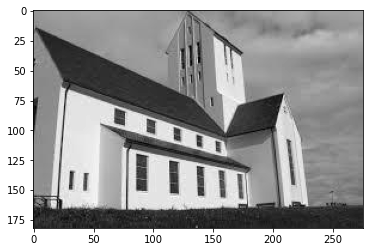

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
from scipy import signal as sig
import numpy as np
from skimage.feature import corner_harris, corner_peaks

#Reading the image 
img =imread('image1.jpg')
plt.imshow(img,cmap='gray') 



In [2]:
#Finding the gradient along x and y
def gradient_x(img):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(img, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(img, kernel_y, mode='same')

I_x = gradient_x(img)
I_y = gradient_y(img)

#Structure Tensor Setup

Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndi.gaussian_filter(I_y**2, sigma=1)

#Measuring the corner response:
#K can have value in range 0.04-0.06
#Taking k=0.04
k = 0.04

# Finding the determinant
det_A = Ixx * Iyy - Ixy ** 2
#Finding the trace
traceA = Ixx + Iyy
#Computing harris response   
harris_response = det_A - k * traceA ** 2



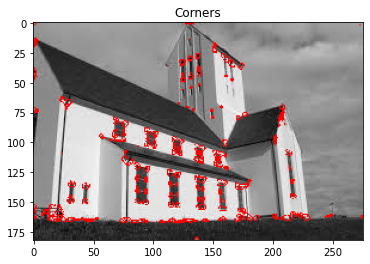

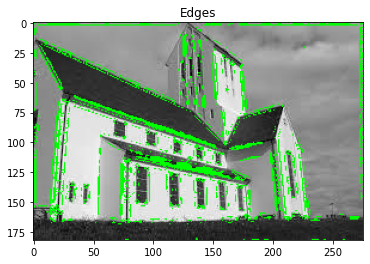

In [3]:
#Performing non-maximum suppression
filename = 'image1.jpg'
img = cv2.imread(filename)
corners = np.copy(img)
edges = np.copy(img)

#Now after finding the harris response
#Finding the corners and edges

for i, rsp in enumerate(harris_response):
    for j, r in enumerate(rsp):
        if r > 460000000 :
            # Corner
            corners[i,j] =[255,0,0]
        elif r < -8000000:
            # Edge
            edges[i,j] = [0,255,0]
    

plt.title("Corners")
plt.imshow(corners,cmap="gray")
plt.show()
plt.title("Edges")
plt.imshow(edges,cmap="gray")
plt.show()
